IMPORTAMOS LAS LIBRRÍAS QUE VAMOS A UTLIZAR 

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

Este código descargará los datos históricos del par de divisas USD/ARS y USD/UYU desde el 1 de enero de 2020 hasta el 24 de abril de 2024. Luego, trazará ambos conjuntos de datos en un gráfico para comparar su evolución.

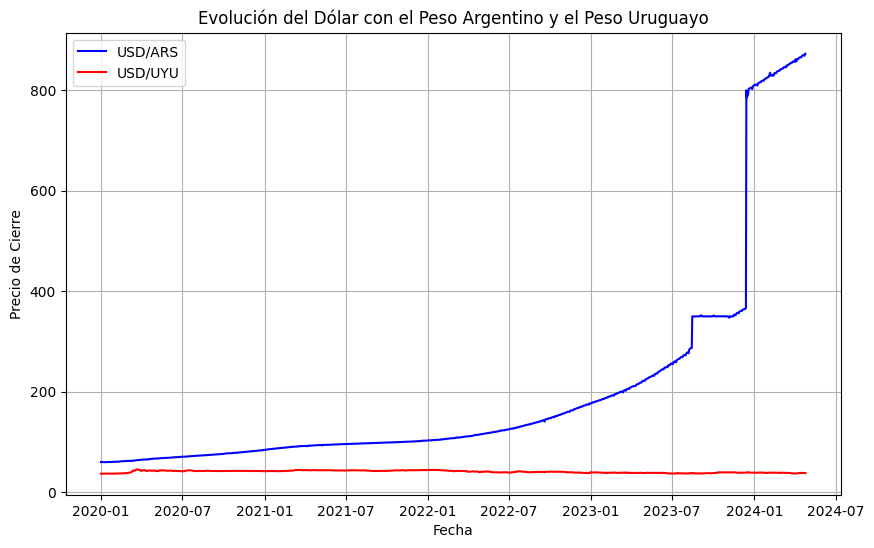

In [3]:


# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Obtener datos históricos del par de divisas USD/UYU (dólar estadounidense a peso uruguayo)
ticker_uyu = "UYU=X"
data_uyu = yf.download(ticker_uyu, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Graficar la evolución del dólar con el peso argentino y el peso uruguayo
plt.figure(figsize=(10, 6))
plt.plot(data_ars, label='USD/ARS', color='blue')
plt.plot(data_uyu, label='USD/UYU', color='red')
plt.title('Evolución del Dólar con el Peso Argentino y el Peso Uruguayo')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid(True)
plt.show()


1-Cálculo de retornos diarios : Puedes calcular los retornos diarios de cada par de divisas para analizar su volatilidad y rendimiento a corto plazo.

Este código calculará los retornos diarios para los pares de divisas USD/ARS y USD/UYU utilizando los datos de precios de cierre históricos obtenidos de Yahoo Finance. 

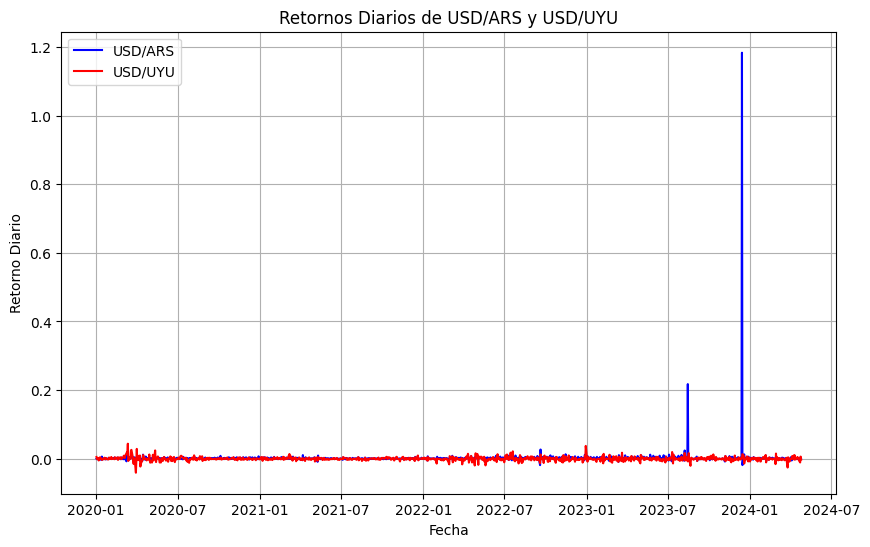

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt

# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Obtener datos históricos del par de divisas USD/UYU (dólar estadounidense a peso uruguayo)
ticker_uyu = "UYU=X"
data_uyu = yf.download(ticker_uyu, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Calcular los retornos diarios para cada par de divisas
returns_ars = data_ars.pct_change().dropna()
returns_uyu = data_uyu.pct_change().dropna()

# Graficar los retornos diarios
plt.figure(figsize=(10, 6))
plt.plot(returns_ars, label='USD/ARS', color='blue')
plt.plot(returns_uyu, label='USD/UYU', color='red')
plt.title('Retornos Diarios de USD/ARS y USD/UYU')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend()
plt.grid(True)
plt.show()


2-Análisis de valoración : Puedes calcular la valoración entre los retornos del par de divisas USD/ARS y USD/UYU para ver si hay alguna relación entre ellos.

Calculará la estimación entre los retornos del par de divisas USD/ARS y USD/UYU utilizando los datos de precios de cierre históricos obtenidos de Yahoo Finance. La valoración se calcula utilizando el método corr()de pandas sobre los retornos diarios de ambos pares de divisas. La compensación es un valor que oscila entre -1 y 1, donde 1 indica una compensación positiva perfecta, -1 indica una compensación negativa perfecta y 0 indica ausencia de compensación.

In [5]:
# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Obtener datos históricos del par de divisas USD/UYU (dólar estadounidense a peso uruguayo)
ticker_uyu = "UYU=X"
data_uyu = yf.download(ticker_uyu, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Calcular los retornos diarios para cada par de divisas
returns_ars = data_ars.pct_change().dropna()
returns_uyu = data_uyu.pct_change().dropna()

# Calcular la correlación entre los retornos de USD/ARS y USD/UYU
correlation = returns_ars.corr(returns_uyu)

print("Correlación entre USD/ARS y USD/UYU:")
print(correlation)

Correlación entre USD/ARS y USD/UYU:
0.0073554109392462595


La valoración entre los retornos del par de divisas USD/ARS y USD/UYU es de aproximadamente 0.007, lo que indica una valoración muy baja entre estos dos pares de divisas. Una aproximación cercana a cero sugiere que los movimientos de los precios de uno de los pares de divisas no están relacionados con los movimientos de los precios del otro par. En otras palabras, los cambios en el precio del dólar estadounidense frente al peso argentino no tienen una relación significativa con los cambios en el precio del dólar estadounidense frente al peso uruguayo en este período de tiempo.

Esta baja valoración puede ser útil para los inversores que buscan diversificar su exposición al riesgo de cambiario, ya que los movimientos en un par de divisas no necesariamente se traducen en movimientos similares en otro par. Sin embargo, es importante recordar que la determinación puede cambiar con el tiempo, por lo que siempre es importante monitorear y ajustar las estrategias de inversión en consecuencia.

Descomposición de series temporales: Puedes descomponer las series temporales de los precios de cierre en tendencia, estacionalidad y componentes residuales para identificar patrones a largo plazo y estacionalidad en los datos.

Para descomponer las series temporales de los precios de cierre en tendencia, estacionalidad y componentes residuales, podemos utilizar el método seasonal_decomposede la biblioteca statsmodels

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Este código descompone la serie temporal de los precios de cierre del par de divisas USD/ARS en tendencia, estacionalidad y componentes residuales utilizando un modelo aditivo. Luego, traza cada una de estos componentes junto con la serie temporal original para que puedas identificar los patrones a largo plazo y la estacionalidad en los datos. La revisión aditiva supone que los cambios en la serie temporal son lineales con el tiempo. 

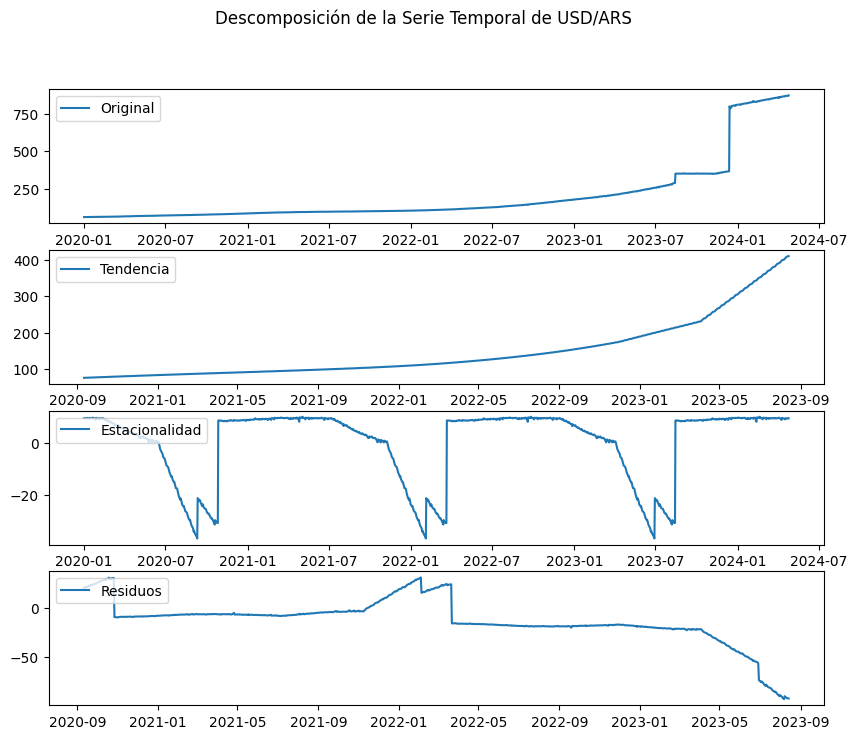

In [7]:
# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Descomposición de la serie temporal de los precios de cierre en tendencia, estacionalidad y componente residual
decomposition_ars = seasonal_decompose(data_ars, model='additive', period=365)

# Graficar la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data_ars, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition_ars.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_ars.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition_ars.resid, label='Residuos')
plt.legend(loc='upper left')

plt.suptitle('Descomposición de la Serie Temporal de USD/ARS')
plt.show()

Este código realizará el análisis de la serie temporal de los precios de cierre del par de divisas USD/UYU en tendencia, estacionalidad y componentes residuales, y luego trazará cada uno de estos componentes junto con la serie temporal original. De esta manera, podrás identificar los patrones a largo plazo y la estacionalidad en los datos del par de divisas USD/UYU.

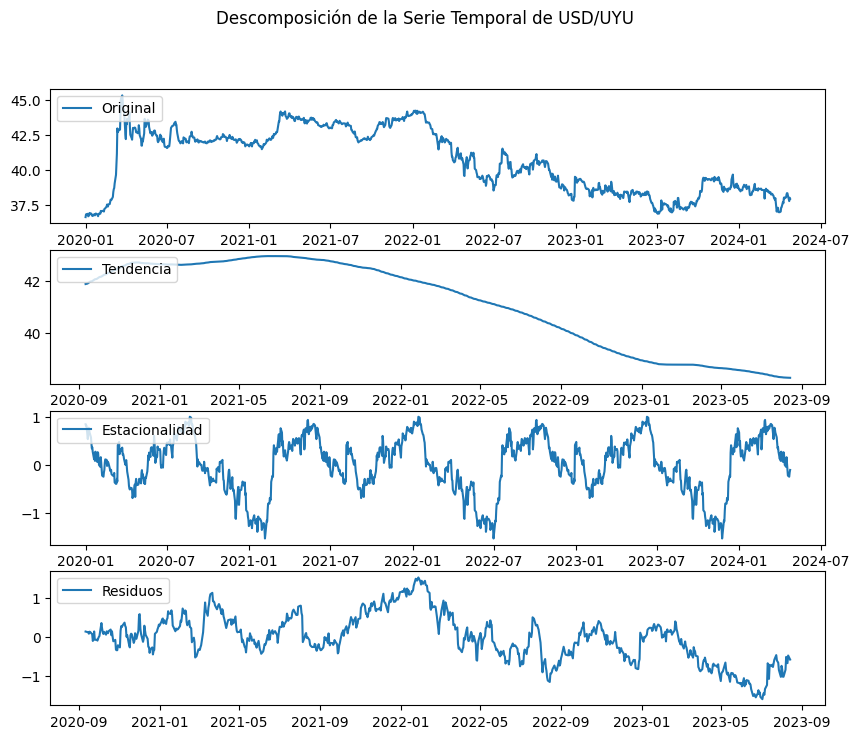

In [8]:
# Obtener datos históricos del par de divisas USD/UYU (dólar estadounidense a peso uruguayo)
ticker_uyu = "UYU=X"
data_uyu = yf.download(ticker_uyu, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Descomposición de la serie temporal de los precios de cierre en tendencia, estacionalidad y componente residual
decomposition_uyu = seasonal_decompose(data_uyu, model='additive', period=365)

# Graficar la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data_uyu, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(decomposition_uyu.trend, label='Tendencia')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(decomposition_uyu.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(decomposition_uyu.resid, label='Residuos')
plt.legend(loc='upper left')

plt.suptitle('Descomposición de la Serie Temporal de USD/UYU')
plt.show()

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\AppDa

Mejores parámetros:
order: (1, 1, 2)
seasonal_order: (0, 0, 0, 12)
Mejor RMSE: 36.88388788408065


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


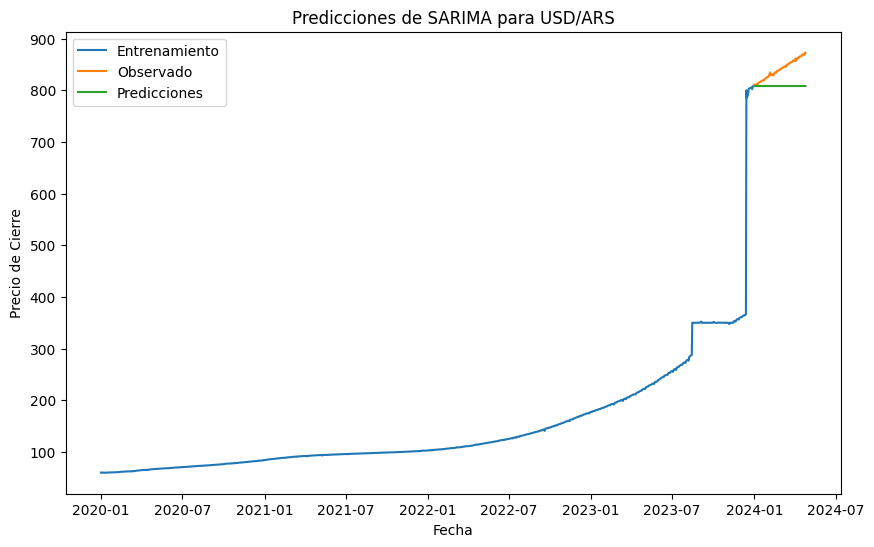

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close']

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data_ars[:'2023-12-31']
test_data = data_ars['2024-01-01':]

# Ajustar los parámetros del modelo SARIMA para obtener mejores resultados
best_rmse = np.inf
best_order = None
best_seasonal_order = None

# Probar diferentes combinaciones de parámetros
for p in range(3):
    for d in range(2):
        for q in range(3):
            for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        try:
                            order = (p, d, q)
                            seasonal_order = (P, D, Q, 12)
                            
                            # Entrenar el modelo SARIMA
                            model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
                            model_fit = model.fit()

                            # Realizar predicciones
                            predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

                            # Calcular el error cuadrático medio (RMSE)
                            mse = mean_squared_error(test_data, predictions)
                            rmse = np.sqrt(mse)

                            # Actualizar los mejores parámetros si se encuentra un mejor RMSE
                            if rmse < best_rmse:
                                best_rmse = rmse
                                best_order = order
                                best_seasonal_order = seasonal_order
                        except:
                            continue

# Imprimir los mejores parámetros
print('Mejores parámetros:')
print('order:', best_order)
print('seasonal_order:', best_seasonal_order)
print('Mejor RMSE:', best_rmse)

# Entrenar el modelo SARIMA con los mejores parámetros
model = SARIMAX(train_data, order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit()

# Realizar predicciones
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(test_data, label='Observado')
plt.plot(predictions, label='Predicciones')
plt.title('Predicciones de SARIMA para USD/ARS')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


Este código entrena un modelo SARIMA utilizando una red neuronal recurrente (LSTM) implementada en PyTorch. Se utiliza una ventana deslizante para crear secuencias de datos de entrenamiento y se normalizan los datos para mejorar la convergencia del modelo. Luego, el modelo se entrena utilizando la función de pérdida de error cuadrático medio (MSELoss) y el optimizador Adam. Una vez entrenado, el modelo realiza predicciones sobre los datos de prueba y se desnormalizan para compararlas con los datos reales. Finalmente, se trazan las predicciones junto con los datos de entrenamiento y prueba.

In [10]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0002
Epoch [30/100], Loss: 0.0002
Epoch [40/100], Loss: 0.0001
Epoch [50/100], Loss: 0.0001
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0001
Epoch [80/100], Loss: 0.0001
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


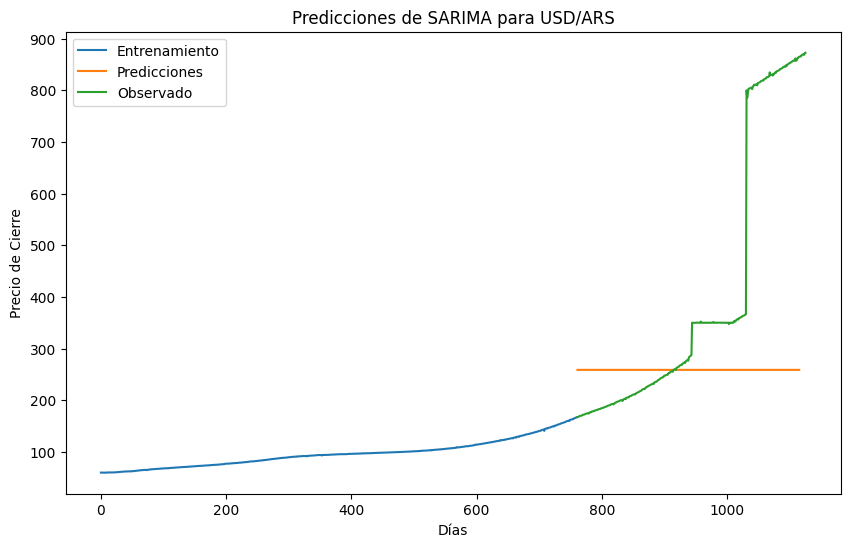

In [11]:
# Obtener datos históricos del par de divisas USD/ARS (dólar estadounidense a peso argentino)
ticker_ars = "ARS=X"
data_ars = yf.download(ticker_ars, start="2020-01-01", end="2024-04-24", progress=False)['Close'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data_ars[:len(data_ars)-365]
test_data = data_ars[len(data_ars)-365:]

# Normalizar los datos
mean_train_data = np.mean(train_data)
std_train_data = np.std(train_data)
train_data_normalized = (train_data - mean_train_data) / std_train_data

# Definir la función para crear secuencias de entrada y salida
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return sequences

# Crear secuencias de entrenamiento
seq_length = 10
train_sequences = create_sequences(train_data_normalized, seq_length)

# Definir el modelo SARIMA con PyTorch
class SARIMA(nn.Module):
    def __init__(self):
        super(SARIMA, self).__init__()
        self.lstm = nn.LSTM(seq_length, 128)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x, _ = self.lstm(x.unsqueeze(-1))
        x = self.fc(x[:, -1])
        return x

# Instanciar el modelo y definir la función de pérdida y el optimizador
model = SARIMA()
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
epochs = 100
for epoch in range(epochs):
    model.train()
    for seq, target in train_sequences:
        optimizer.zero_grad()
        seq = torch.tensor(seq, dtype=torch.float32).unsqueeze(0)
        target = torch.tensor(target, dtype=torch.float32).unsqueeze(0)
        output = model(seq)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Realizar predicciones
model.eval()
predictions_normalized = []
with torch.no_grad():
    for i in range(len(test_data) - seq_length):
        seq = torch.tensor(test_data[i:i + seq_length], dtype=torch.float32).unsqueeze(0)
        prediction = model(seq)
        predictions_normalized.append(prediction.item())

# Desnormalizar las predicciones
predictions = np.array(predictions_normalized) * std_train_data + mean_train_data

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(range(len(train_data), len(train_data) + len(predictions)), predictions, label='Predicciones')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Observado')
plt.title('Predicciones de SARIMA para USD/ARS')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()

Este código descargará los datos más recientes del par de divisas USD/ARS, actualizará tus conjuntos de datos de entrenamiento y prueba y luego los visualizará utilizando matplotlib. Puedes ejecutar esta función periódicamente para obtener actualizaciones en tiempo real de los datos.

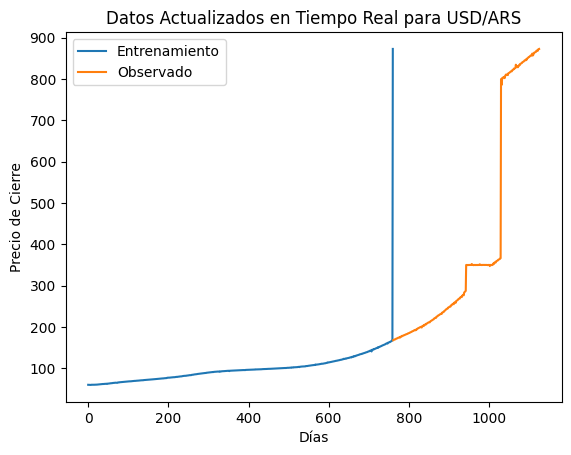

In [12]:
# Función para visualizar los datos actualizados en tiempo real
def visualize_real_time_data():
    # Descargar los datos más recientes del par de divisas USD/ARS
    ticker_ars = "ARS=X"
    data_ars_new = yf.download(ticker_ars, period="1d", progress=False)['Close'].values
    
    # Actualizar los conjuntos de datos de entrenamiento y prueba
    global train_data, test_data
    train_data = np.concatenate((train_data[1:], [data_ars_new[0]]))
    test_data = np.concatenate((test_data[1:], [data_ars_new[0]]))
    
    # Mostrar los datos actualizados
    plt.plot(train_data, label='Entrenamiento')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Observado')
    plt.title('Datos Actualizados en Tiempo Real para USD/ARS')
    plt.xlabel('Días')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.show()

# Ejecutar la función para visualizar los datos actualizados en tiempo real
visualize_real_time_data()

Este código utilizará los datos históricos del par de divisas USD/UYU para entrenar un modelo SARIMA implementado con una red neuronal recurrente (LSTM) en PyTorch. Luego, se realizarán predicciones sobre los datos de prueba y se graficarán junto con los datos de entrenamiento y prueba observados.

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0002
Epoch [20/100], Loss: 0.0033
Epoch [30/100], Loss: 0.0082
Epoch [40/100], Loss: 0.0091
Epoch [50/100], Loss: 0.0071
Epoch [60/100], Loss: 0.0051
Epoch [70/100], Loss: 0.0034
Epoch [80/100], Loss: 0.0022
Epoch [90/100], Loss: 0.0013
Epoch [100/100], Loss: 0.0008


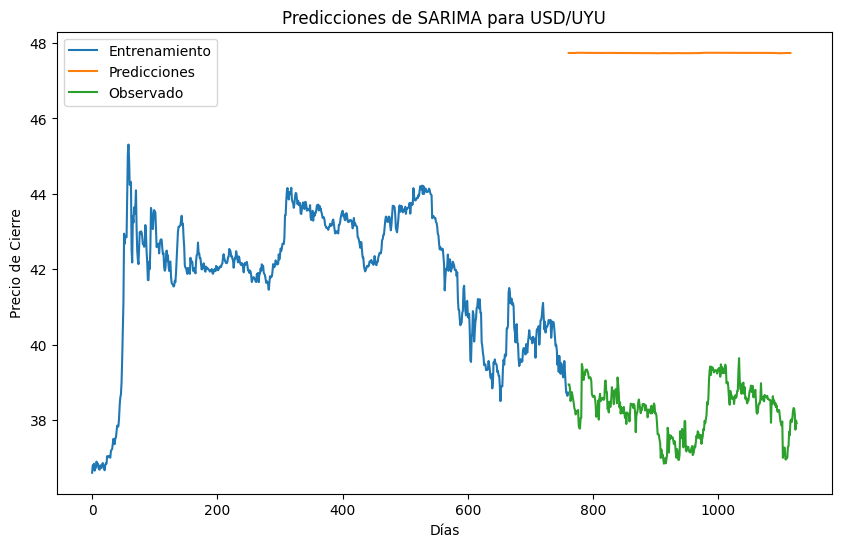

In [13]:
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import torch
import torch.nn as nn
from torch.optim import Adam

# Obtener datos históricos del par de divisas USD/UYU (dólar estadounidense a peso uruguayo)
ticker_uyu = "UYU=X"
data_uyu = yf.download(ticker_uyu, start="2020-01-01", end="2024-04-24", progress=False)['Close'].values

# Dividir los datos en conjuntos de entrenamiento y prueba
train_data = data_uyu[:len(data_uyu)-365]
test_data = data_uyu[len(data_uyu)-365:]

# Normalizar los datos
mean_train_data = np.mean(train_data)
std_train_data = np.std(train_data)
train_data_normalized = (train_data - mean_train_data) / std_train_data

# Definir la función para crear secuencias de entrada y salida
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append((sequence, target))
    return sequences

# Crear secuencias de entrenamiento
seq_length = 10
train_sequences = create_sequences(train_data_normalized, seq_length)

# Definir el modelo SARIMA con PyTorch
class SARIMA(nn.Module):
    def __init__(self):
        super(SARIMA, self).__init__()
        self.lstm = nn.LSTM(seq_length, 128)
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        x, _ = self.lstm(x.unsqueeze(-1))
        x = self.fc(x[:, -1])
        return x

# Instanciar el modelo y definir la función de pérdida y el optimizador
model = SARIMA()
criterion = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

# Entrenar el modelo
epochs = 100
for epoch in range(epochs):
    model.train()
    for seq, target in train_sequences:
        optimizer.zero_grad()
        seq = torch.tensor(seq, dtype=torch.float32).unsqueeze(0)
        target = torch.tensor(target, dtype=torch.float32).unsqueeze(0)
        output = model(seq)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Realizar predicciones
model.eval()
predictions_normalized = []
with torch.no_grad():
    for i in range(len(test_data) - seq_length):
        seq = torch.tensor(test_data[i:i + seq_length], dtype=torch.float32).unsqueeze(0)
        prediction = model(seq)
        predictions_normalized.append(prediction.item())

# Desnormalizar las predicciones
predictions = np.array(predictions_normalized) * std_train_data + mean_train_data

# Graficar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Entrenamiento')
plt.plot(range(len(train_data), len(train_data) + len(predictions)), predictions, label='Predicciones')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Observado')
plt.title('Predicciones de SARIMA para USD/UYU')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


Este código descargará los datos más recientes del par de divisas USD/UYU, los actualizará en tus conjuntos de datos de entrenamiento y prueba.

 Puedes ejecutar esta función periódicamente para obtener actualizaciones en tiempo real de los datos.

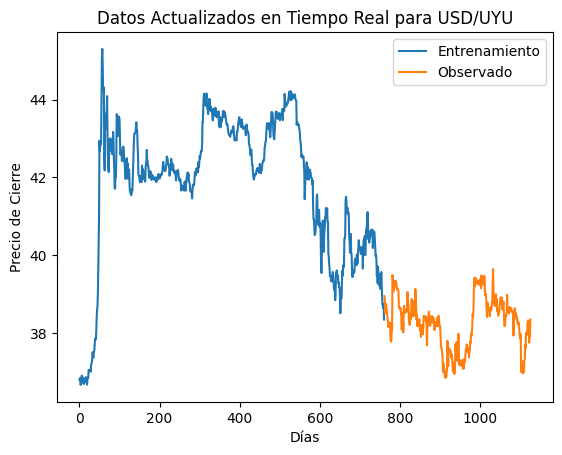

In [14]:
# Función para visualizar los datos actualizados en tiempo real
def visualize_real_time_data():
    # Descargar los datos más recientes del par de divisas USD/UYU
    ticker_uyu = "UYU=X"
    data_uyu_new = yf.download(ticker_uyu, period="1d", progress=False)['Close'].values
    
    # Actualizar los conjuntos de datos de entrenamiento y prueba
    global train_data, test_data
    train_data = np.concatenate((train_data[1:], [data_uyu_new[0]]))
    test_data = np.concatenate((test_data[1:], [data_uyu_new[0]]))
    
    # Mostrar los datos actualizados
    plt.plot(train_data, label='Entrenamiento')
    plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data, label='Observado')
    plt.title('Datos Actualizados en Tiempo Real para USD/UYU')
    plt.xlabel('Días')
    plt.ylabel('Precio de Cierre')
    plt.legend()
    plt.show()

# Ejecutar la función para visualizar los datos actualizados en tiempo real
visualize_real_time_data()

Este código utiliza TensorFlow Probability para definir un modelo de regresión lineal bayesiano y Pyro para realizar inferencias bayesianas utilizando inferencia variacional. Luego, se realizan predicciones del precio de cierre de acciones utilizando el modelo entrenado, y se visualizan junto con la incertidumbre estimada. 